<a href="https://colab.research.google.com/github/cardarzam/DS-Coderhouse/blob/main/entrega_final_24_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Estructurando un proyecto de DS**



**Abstract**

El objetivo de este estudio es analizar la correlación entre la variación del precio de Bitcoin y el índice S&P 500. Para ello, se recopilaron datos diarios del precio de Bitcoin y los valores del índice S&P 500 durante el período 2012-2017. Utilizando técnicas estadísticas, se calculara la correlación entre las variaciones diarias de ambos activos. La correlación puede variar en una escala de -1 a 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica una falta de correlación.

Hipótesis:
• Existe correlación entre la variación de precios del Índice S&P y Bitcoin?
• Cuando el precio del Índice S&P tiene tendencia a la baja, esa tendencia se evidencia en el precio del Bitcoin?
• Cuando el precio del Bitcoin tiene tendencia el alza, esa tendencia se evidencia en el Índice S&P?

Se buscara establecer, utilizando técnicas estadísticas, la correlación o no entre las variaciones de precios de ambos activos. Una correlación positiva indicaría que los precios de Bitcoin y el S&P 500 tienden a moverse en la misma dirección, es decir, cuando el S&P 500 sube, el precio de Bitcoin también tiende a subir, y viceversa. Por otro lado, una correlación negativa indicaría que los precios se mueven en direcciones opuestas. Es importante tener en cuenta que la correlación no implica causalidad, es decir, no significa que los movimientos en el precio de Bitcoin causen cambios en el índice S&P 500 o viceversa. Puede haber otros factores o eventos macroeconómicos que influyan en ambos activos simultáneamente.

##Hipótesis
• Existe correlación entre la variación de precios del Índice S&P y Bitcoin?

• Cuando el precio del Índice S&P tiene tendencia a la baja, esa tendencia se evidencia en el precio del Bitcoin?

• Cuando el precio del Bitcoin tiene tendencia el alza, esa tendencia se evidencia en el Índice S&P?




**Contexto Comercial.**

**Índice S&P**

El índice Standard & Poor´s 500, o más conocido como S&P 500, recoge 500 empresas estadounidenses seleccionadas por su tamaño, liquidez y representatividad por actividad económica, incluyendo 400 industriales, 20 del sector transporte, 40 de servicios y 40 financieras. El S&P 500 fue creado en el año 1923, cuando la empresa Standard & Poor´s introdujo un índice cubriendo 233 compañías. Sin embargo, el selectivo, tal y como se conoce hoy en día, fue creado en 1957 cuando se expandió incluyendo las 500 compañías más grandes del mundo. La elección de las compañías que tributan dentro del mismo se realiza por capitalización y es lo suficientemente representativo, pero no contempla empresas pequeñas y medianas. El S&P 500 se calcula mediante una media aritmética ponderada por capitalización y representa la mayor parte de la capitalización bursátil de los Estados.

**Bitcoin**

El Bitcoin es una moneda digital o criptomoneda que puede utilizarse para intercambiar bienes y servicios como cualquier otra moneda. Es una moneda eletrónica libre y descentralizada que permite la transacción directa sin ningún intermediario. A diferencia de cualquier otra divisa, el Bitcoin no es dinero fiduciario. Es decir, no está respaldado por la confianza de un banco central, por un gobierno o por un material (por ejemplo patrón oro). En cambio, sí que utilizan un sistema de prueba de trabajo para evitar el doble gasto y se alcance un consenso entre todos los nodos que operan en la red. Este consenso se conoce como blockchain (cadena de bloques).

**Problema comercial.** La pregunta que se tratara de responder es: existe correlación entre la variación de precios del Índice S&P y Bitcoin?

**Contexto Analítico**.contamos con datasets con las variaciones de precios (mínimos,máximos,cierre y apertura) tanto del Índice S&P como de Bitcoin en el periodo 2012-2017.

El caso se estructura de la siguiente manera, vamos a:

1. Realizar análisis de datos exploratorios para investigar visualmente la estructura de los datos.
2. Diseño de gráficos de dispersión de las distintas variables de precios para analizar la variación de ambos activos.
3. Extraer conclusiones sobre la correlación o no en el movimiento de precios de ambos activos.

**Acceso Google Drive**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


**Importación de librerías**

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn # Paquete base de ML

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:

from sklearn.metrics import median_absolute_error

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error

##**Carga Datasets**

In [ ]:
bitcoin=pd.read_csv("Datos históricos BTC_USD Bitfinex.csv", encoding="latin",sep=";")
bitcoin

,Date,Close,Apertura,Máximo,Mínimo,Volume,% var.
0,15.11.2017,"7.278,30","6.589,90","7.310,20","6.589,90","71,61K","10,63%"
1,14.11.2017,"6.579,20","6.476,50","6.687,80","6.315,40","49,52K","1,62%"
2,13.11.2017,"6.474,60","5.806,50","6.680,00","5.786,10","110,44K","11,21%"
3,12.11.2017,"5.822,10","6.282,40","6.465,00","5.426,00","172,69K","-7,60%"
4,11.11.2017,"6.300,70","6.541,20","6.788,00","6.166,00","72,84K","-3,69%"
...,...,...,...,...,...,...,...
2105,06.02.2012,"5,4","5,4","5,4","5,4",NaN,"-4,22%"
2106,05.02.2012,"5,7","5,7","5,7","5,7",NaN,"-3,07%"
2107,04.02.2012,"5,9","5,9","5,9","5,9",NaN,"-1,51%"
2108,03.02.2012,6,6,6,6,NaN,"-2,30%"


In [ ]:
bitcoin=pd.read_csv("Datos históricos BTC_USD Bitfinex.csv", encoding="latin",sep=";")
bitcoin

,Date,Close,Apertura,Máximo,Mínimo,Volume,% var.
0,15.11.2017,"7.278,30","6.589,90","7.310,20","6.589,90","71,61K","10,63%"
1,14.11.2017,"6.579,20","6.476,50","6.687,80","6.315,40","49,52K","1,62%"
2,13.11.2017,"6.474,60","5.806,50","6.680,00","5.786,10","110,44K","11,21%"
3,12.11.2017,"5.822,10","6.282,40","6.465,00","5.426,00","172,69K","-7,60%"
4,11.11.2017,"6.300,70","6.541,20","6.788,00","6.166,00","72,84K","-3,69%"
...,...,...,...,...,...,...,...
2105,06.02.2012,"5,4","5,4","5,4","5,4",NaN,"-4,22%"
2106,05.02.2012,"5,7","5,7","5,7","5,7",NaN,"-3,07%"
2107,04.02.2012,"5,9","5,9","5,9","5,9",NaN,"-1,51%"
2108,03.02.2012,6,6,6,6,NaN,"-2,30%"


**Data Wrangling dataset Bitcoin**

Al dataset de Bitcoin se le hicieron las siguientes modificaciones:

*   Formato fecha a columna Date
*   Renombrar columnas (Date y close)




In [ ]:
pd.to_datetime("02-12-2012")

Timestamp('2012-02-12 00:00:00')

In [ ]:
bitcoin['Year'] = pd.to_datetime(bitcoin['Date']).dt.year #Agregue la columna año para poder filtrar los gráficos

<ipython-input-15-223b1832efaf>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bitcoin['Year'] = pd.to_datetime(bitcoin['Date']).dt.year #Agregue la columna año para poder filtrar los gráficos


In [ ]:
bitcoin.rename(columns={'Date': 'Fecha'}, inplace=True)

In [ ]:
bitcoin.rename(columns={'Close': 'Último'}, inplace=True)

In [ ]:
bitcoin

,Fecha,Último,Apertura,Máximo,Mínimo,Volume,% var.,Year
0,15.11.2017,"7.278,30","6.589,90","7.310,20","6.589,90","71,61K","10,63%",2017
1,14.11.2017,"6.579,20","6.476,50","6.687,80","6.315,40","49,52K","1,62%",2017
2,13.11.2017,"6.474,60","5.806,50","6.680,00","5.786,10","110,44K","11,21%",2017
3,12.11.2017,"5.822,10","6.282,40","6.465,00","5.426,00","172,69K","-7,60%",2017
4,11.11.2017,"6.300,70","6.541,20","6.788,00","6.166,00","72,84K","-3,69%",2017
...,...,...,...,...,...,...,...,...
2105,06.02.2012,"5,4","5,4","5,4","5,4",NaN,"-4,22%",2012
2106,05.02.2012,"5,7","5,7","5,7","5,7",NaN,"-3,07%",2012
2107,04.02.2012,"5,9","5,9","5,9","5,9",NaN,"-1,51%",2012
2108,03.02.2012,6,6,6,6,NaN,"-2,30%",2012


In [ ]:
for var in ['Último', 'Apertura', 'Máximo','Mínimo']:
 bitcoin[var]=bitcoin[var].str.replace(".","").str.replace(",",".").astype('float64')

<ipython-input-19-dfd79c1364e3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitcoin[var]=bitcoin[var].str.replace(".","").str.replace(",",".").astype('float64')


In [ ]:
bitcoin["Fecha"]=pd.to_datetime(bitcoin["Fecha"],dayfirst=True)

In [ ]:
bitcoin.rename(columns={'Último': 'Ultimo'}, inplace=True)

In [ ]:
pd.read_csv('Datos históricos S&P 500.csv', encoding="latin",sep=";")

,Fecha,Último,Apertura,Máximo,Mínimo,% var.
0,15.11.2017,"2.564,62","2.569,45","2.572,84","2.557,45","-0,55%"
1,14.11.2017,"2.578,87","2.577,75","2.579,66","2.566,56","-0,23%"
2,13.11.2017,"2.584,84","2.576,53","2.587,66","2.574,48","0,10%"
3,10.11.2017,"2.582,30","2.580,18","2.583,81","2.575,57","-0,09%"
4,09.11.2017,"2.584,62","2.584,00","2.586,50","2.566,33","-0,38%"
...,...,...,...,...,...,...
1453,08.02.2012,"1.349,96","1.347,04","1.351,00","1.341,95","0,22%"
1454,07.02.2012,"1.347,05","1.344,33","1.349,24","1.335,92","0,20%"
1455,06.02.2012,"1.344,33","1.344,32","1.344,36","1.337,52","-0,04%"
1456,03.02.2012,"1.344,90","1.326,21","1.345,34","1.326,21","1,46%"


**Data Wrangling S&P**

Al dataset del índice S&P, se le hicieron las siguientes modificaciones:



*   Formato fecha a columna Fecha
*   Renombrar columnas
*   Eliminar columnas




In [ ]:
tabla_S_P = pd.read_csv('Datos históricos S&P 500.csv', encoding="latin",sep=";")

In [ ]:
tabla_S_P["Fecha"]=pd.to_datetime(tabla_S_P["Fecha"],dayfirst=True)

In [ ]:
tabla_S_P['Year'] = pd.to_datetime(tabla_S_P['Fecha']).dt.year #Agregue la columna year para poder filtar por año

In [ ]:
tabla_S_P.rename(columns={'Último': 'Ultimo'}, inplace=True)

In [ ]:
tabla_S_P = tabla_S_P.drop("% var.", axis=1)

In [ ]:
for var in ['Ultimo', 'Apertura', 'Máximo','Mínimo']:
 tabla_S_P[var]=tabla_S_P[var].str.replace(".","").str.replace(",",".").astype('float64')

<ipython-input-28-d9b8353085f3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tabla_S_P[var]=tabla_S_P[var].str.replace(".","").str.replace(",",".").astype('float64')


In [ ]:
tabla_S_P

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year
0,2017-11-15,2564.62,2569.45,2572.84,2557.45,2017
1,2017-11-14,2578.87,2577.75,2579.66,2566.56,2017
2,2017-11-13,2584.84,2576.53,2587.66,2574.48,2017
3,2017-11-10,2582.30,2580.18,2583.81,2575.57,2017
4,2017-11-09,2584.62,2584.00,2586.50,2566.33,2017
...,...,...,...,...,...,...
1453,2012-02-08,1349.96,1347.04,1351.00,1341.95,2012
1454,2012-02-07,1347.05,1344.33,1349.24,1335.92,2012
1455,2012-02-06,1344.33,1344.32,1344.36,1337.52,2012
1456,2012-02-03,1344.90,1326.21,1345.34,1326.21,2012


#**Unión Datasets**

En esta etapa, aplique Data Wrangling para unir ambos datasets utilizando la función "Merge". Luego, ajuste las columnas del dataset que necesitaba para realizar los gráficos de las variables (Máx., Mín., Apertura, Cierre) de ambos activos

In [ ]:
tabla_graficos=bitcoin.merge(tabla_S_P, left_index = True, right_index= True )

In [ ]:
tabla_graficos = tabla_graficos.drop("Fecha_y", axis=1)

In [ ]:
tabla_graficos = tabla_graficos.drop("Year_x", axis=1)

In [ ]:
tabla_graficos = tabla_graficos.drop("Volume", axis=1)

In [ ]:
tabla_graficos = tabla_graficos.drop("Year_y", axis=1)

In [ ]:
tabla_graficos.rename(columns={'Fecha_x': 'Fecha'}, inplace=True)

In [ ]:
tabla_graficos = tabla_graficos.drop("% var.", axis=1)

In [ ]:
tabla_graficos['Year'] = pd.to_datetime(tabla_graficos['Fecha']).dt.year

In [ ]:
tabla_graficos

,Fecha,Ultimo_x,Apertura_x,Máximo_x,Mínimo_x,Ultimo_y,Apertura_y,Máximo_y,Mínimo_y,Year
0,2017-11-15,7278.3,6589.9,7310.2,6589.9,2564.62,2569.45,2572.84,2557.45,2017
1,2017-11-14,6579.2,6476.5,6687.8,6315.4,2578.87,2577.75,2579.66,2566.56,2017
2,2017-11-13,6474.6,5806.5,6680.0,5786.1,2584.84,2576.53,2587.66,2574.48,2017
3,2017-11-12,5822.1,6282.4,6465.0,5426.0,2582.30,2580.18,2583.81,2575.57,2017
4,2017-11-11,6300.7,6541.2,6788.0,6166.0,2584.62,2584.00,2586.50,2566.33,2017
...,...,...,...,...,...,...,...,...,...,...
1453,2013-11-19,599.0,600.0,690.9,418.4,1349.96,1347.04,1351.00,1341.95,2013
1454,2013-11-18,585.2,461.0,590.6,461.0,1347.05,1344.33,1349.24,1335.92,2013
1455,2013-11-17,473.3,435.9,473.3,435.9,1344.33,1344.32,1344.36,1337.52,2013
1456,2013-11-16,435.3,412.0,436.0,398.4,1344.90,1326.21,1345.34,1326.21,2013


Cree la tabla_graficos utilizando la función MERGE para conservar las columnas de ambos datasets y poder hacer gráficos comparativos de las diferentes variables. Para el análisis posterior, voy a aplicar la función CONCAT para unir ambos datasets y calcular las diferentes métricas

#EDA

El mundo de las finanzas está en constante evolución, y dos de los activos más comentados en los últimos años son Bitcoin, la criptomoneda líder, y el índice S&P 500, que rastrea el rendimiento de las 500 principales empresas estadounidenses. A lo largo de esta historia de datos, exploraremos la posible relación entre las variaciones de precios de Bitcoin y los movimientos del índice S&P 500.


**Análisis de los Datos**


Para analizar la correlación entre Bitcoin y el S&P 500, recopilamos datos históricos de precios de ambos activos durante el período 2012-2017.


**Visualización series de Tiempo**


Creamos gráficos de dispersión combinados para las variables (Máx., Mín., Precio Apertura, Precio Cierre) de ambos activos. Esto nos permite observar las tendencias y patrones a lo largo del periodo 2012-2017.

##Análisis gráfico variables Bitcoin/S&P

Comparación Precios Máximos Bitcoin y Índice S&P

<Axes: xlabel='Máximo_x', ylabel='Máximo_y'>

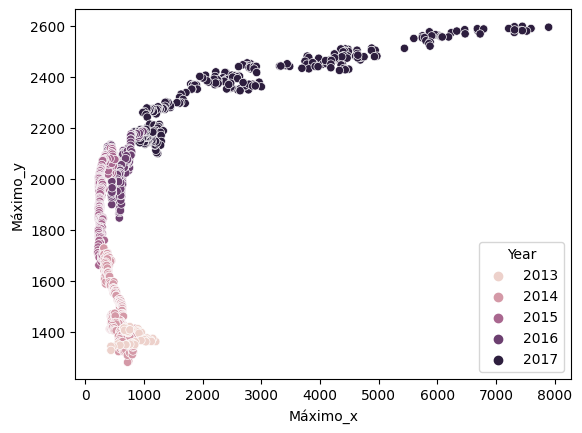

In [ ]:
sns.scatterplot (data= tabla_graficos, x="Máximo_x", y= "Máximo_y",hue= "Year")

Comparación precios mínimos Bitcoin y Índice S&P

<Axes: xlabel='Mínimo_x', ylabel='Mínimo_y'>

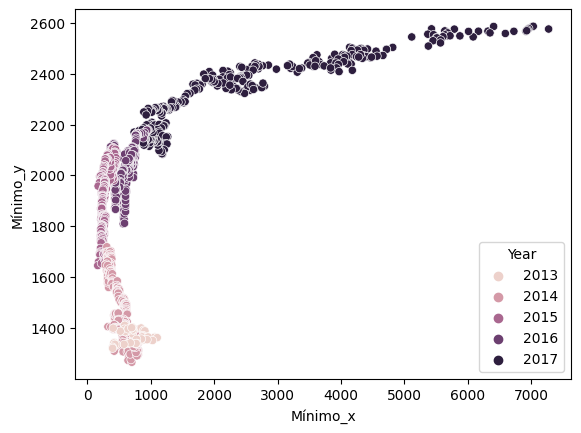

In [ ]:
sns.scatterplot (data= tabla_graficos, x="Mínimo_x", y= "Mínimo_y", hue= "Year")

Comparación Precios de cierre Bitcoin y Índice S&P

<Axes: xlabel='Ultimo_x', ylabel='Ultimo_y'>

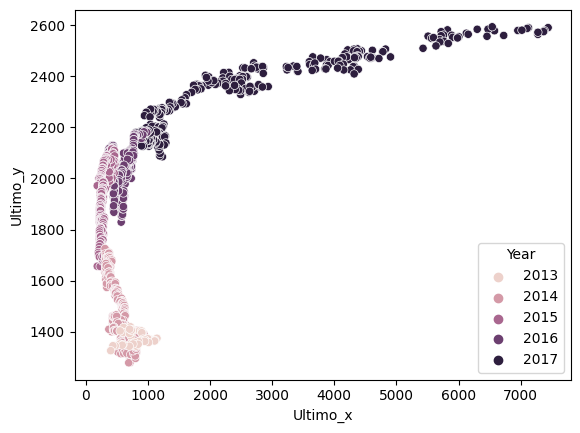

In [ ]:
sns.scatterplot (data= tabla_graficos, x="Ultimo_x", y= "Ultimo_y", hue= "Year")

Comparación precios de apertura Bitcoin y Índice S&P

<Axes: xlabel='Apertura_x', ylabel='Apertura_y'>

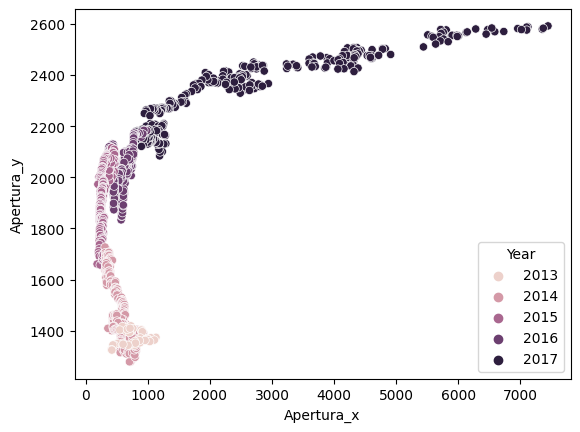

In [ ]:
sns.scatterplot (data= tabla_graficos, x="Apertura_x", y= "Apertura_y",hue= "Year")

Lo que podemos observar en los gráficos comparativos de las variables (Máx., Mín, Precio Apertura, Precio Cierre) de ambos activos es que la correlación entre los mismos es débil en valores inferiores a 2000. Como se observa en los gráficos por separado de los activos, en valores inferiores a 2000, Bitcoin no presenta variaciones significativas en sus valores, en contraste al Índice S&P que muestra variaciones sostenidas.

En base a estas observaciones, podemos inferir que en valores bajos de Bitcoin, no existe relación con los valores observados en el Índice S&P, es a partir de valores superiores a 2000 donde se observa una correlación fuerte entre ambos activos

In [ ]:
tabla_unida=pd.concat([tabla_S_P, bitcoin], axis= 0)

In [ ]:
tabla_unida

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.
0,2017-11-15,2564.62,2569.45,2572.84,2557.45,2017,NaN,NaN
1,2017-11-14,2578.87,2577.75,2579.66,2566.56,2017,NaN,NaN
2,2017-11-13,2584.84,2576.53,2587.66,2574.48,2017,NaN,NaN
3,2017-11-10,2582.30,2580.18,2583.81,2575.57,2017,NaN,NaN
4,2017-11-09,2584.62,2584.00,2586.50,2566.33,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
2105,2012-02-06,5.40,5.40,5.40,5.40,2012,NaN,"-4,22%"
2106,2012-02-05,5.70,5.70,5.70,5.70,2012,NaN,"-3,07%"
2107,2012-02-04,5.90,5.90,5.90,5.90,2012,NaN,"-1,51%"
2108,2012-02-03,6.00,6.00,6.00,6.00,2012,NaN,"-2,30%"


In [ ]:
df= tabla_unida.drop("% var.", axis=1)

In [ ]:
df=tabla_unida.replace(",",".")

In [ ]:
df=tabla_unida.replace("K","")

In [ ]:
df

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.
0,2017-11-15,2564.62,2569.45,2572.84,2557.45,2017,NaN,NaN
1,2017-11-14,2578.87,2577.75,2579.66,2566.56,2017,NaN,NaN
2,2017-11-13,2584.84,2576.53,2587.66,2574.48,2017,NaN,NaN
3,2017-11-10,2582.30,2580.18,2583.81,2575.57,2017,NaN,NaN
4,2017-11-09,2584.62,2584.00,2586.50,2566.33,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
2105,2012-02-06,5.40,5.40,5.40,5.40,2012,NaN,"-4,22%"
2106,2012-02-05,5.70,5.70,5.70,5.70,2012,NaN,"-3,07%"
2107,2012-02-04,5.90,5.90,5.90,5.90,2012,NaN,"-1,51%"
2108,2012-02-03,6.00,6.00,6.00,6.00,2012,NaN,"-2,30%"


#Data Wrangling

#Correlación de variables

In [ ]:
tabla_unida.corr(method= "kendall")

<ipython-input-36-cdae2fa71e29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tabla_unida.corr(method= "kendall")


,Ultimo,Apertura,Máximo,Mínimo,Year
Ultimo,1.000000,0.985690,0.991007,0.989730,0.458293
Apertura,0.985690,1.000000,0.990122,0.988903,0.457738
Máximo,0.991007,0.990122,1.000000,0.985602,0.458730
Mínimo,0.989730,0.988903,0.985602,1.000000,0.457004
Year,0.458293,0.457738,0.458730,0.457004,1.000000


La siguiente tabla evidencia la correlación fuerte entre ambos activos en valores superiores a 1500.

In [ ]:
tabla_unida.loc[tabla_unida["Máximo"]>1500].corr(method= "kendall")

<ipython-input-37-8213f0aa8896>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tabla_unida.loc[tabla_unida["Máximo"]>1500].corr(method= "kendall")


,Ultimo,Apertura,Máximo,Mínimo,Year
Ultimo,1.000000,0.953895,0.970812,0.965613,0.764562
Apertura,0.953895,1.000000,0.968451,0.964302,0.762260
Máximo,0.970812,0.968451,1.000000,0.954543,0.772837
Mínimo,0.965613,0.964302,0.954543,1.000000,0.751075
Year,0.764562,0.762260,0.772837,0.751075,1.000000


#Machine Learning

**Separación de datos: Prueba y Entrenamiento**

In [ ]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(df):
    print(len(train_index))
    print(len(test_index))
df['Train'] = 0
df.loc[df.index.isin(train_index),'Train'] = 1

2497
1071


Marco de datos que incluye la variable de destino y los datos reales junto con los nombres de las funciones.

In [ ]:
import pandas as pd
bos = pd.DataFrame(df)
bos['Fecha'] = tabla_unida.Year
X = bos.drop("Fecha", 1)       # feature matrix
y = bos['Máximo']               # target feature
bos.head()

<ipython-input-39-2988d437f907>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bos.drop("Fecha", 1)       # feature matrix


,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.,Train
0,2017,2564.62,2569.45,2572.84,2557.45,2017,NaN,NaN,1
1,2017,2578.87,2577.75,2579.66,2566.56,2017,NaN,NaN,0
2,2017,2584.84,2576.53,2587.66,2574.48,2017,NaN,NaN,0
3,2017,2582.30,2580.18,2583.81,2575.57,2017,NaN,NaN,1
4,2017,2584.62,2584.00,2586.50,2566.33,2017,NaN,NaN,0


In [ ]:
X

,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.,Train
0,2564.62,2569.45,2572.84,2557.45,2017,NaN,NaN,1
1,2578.87,2577.75,2579.66,2566.56,2017,NaN,NaN,0
2,2584.84,2576.53,2587.66,2574.48,2017,NaN,NaN,0
3,2582.30,2580.18,2583.81,2575.57,2017,NaN,NaN,1
4,2584.62,2584.00,2586.50,2566.33,2017,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2105,5.40,5.40,5.40,5.40,2012,NaN,"-4,22%",1
2106,5.70,5.70,5.70,5.70,2012,NaN,"-3,07%",1
2107,5.90,5.90,5.90,5.90,2012,NaN,"-1,51%",1
2108,6.00,6.00,6.00,6.00,2012,NaN,"-2,30%",1


Data wrangling datos de prueba y entrenamiento

In [ ]:
X['Volume'] = df['Volume'].fillna(0)

In [ ]:
X['% var.'] = df["% var."].fillna(0)

In [ ]:
X['% var.'].replace({'%':''}, regex= True, inplace= True)

In [ ]:
X['% var.'].replace({',':'.'}, regex= True, inplace= True)

In [ ]:
X['% var.']=X['% var.'].astype(float)

In [ ]:
X['Volume'].replace({'K':''}, regex= True, inplace= True)

In [ ]:
X['Volume'].replace({',':'.'}, regex= True, inplace= True)

In [ ]:
X['Volume']=X['Volume'].astype(float)

In [ ]:
X

,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.,Train
0,2564.62,2569.45,2572.84,2557.45,2017,0.0,0.00,1
1,2578.87,2577.75,2579.66,2566.56,2017,0.0,0.00,0
2,2584.84,2576.53,2587.66,2574.48,2017,0.0,0.00,0
3,2582.30,2580.18,2583.81,2575.57,2017,0.0,0.00,1
4,2584.62,2584.00,2586.50,2566.33,2017,0.0,0.00,0
...,...,...,...,...,...,...,...,...
2105,5.40,5.40,5.40,5.40,2012,0.0,-4.22,1
2106,5.70,5.70,5.70,5.70,2012,0.0,-3.07,1
2107,5.90,5.90,5.90,5.90,2012,0.0,-1.51,1
2108,6.00,6.00,6.00,6.00,2012,0.0,-2.30,1


In [ ]:
y

0       2572.84
1       2579.66
2       2587.66
3       2583.81
4       2586.50
         ...   
2105       5.40
2106       5.70
2107       5.90
2108       6.00
2109       6.10
Name: Máximo, Length: 3568, dtype: float64

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)

In [ ]:
df

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.,Train
0,2017,2564.62,2569.45,2572.84,2557.45,2017,NaN,NaN,1
1,2017,2578.87,2577.75,2579.66,2566.56,2017,NaN,NaN,0
2,2017,2584.84,2576.53,2587.66,2574.48,2017,NaN,NaN,0
3,2017,2582.30,2580.18,2583.81,2575.57,2017,NaN,NaN,1
4,2017,2584.62,2584.00,2586.50,2566.33,2017,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2105,2012,5.40,5.40,5.40,5.40,2012,NaN,"-4,22%",1
2106,2012,5.70,5.70,5.70,5.70,2012,NaN,"-3,07%",1
2107,2012,5.90,5.90,5.90,5.90,2012,NaN,"-1,51%",1
2108,2012,6.00,6.00,6.00,6.00,2012,NaN,"-2,30%",1


In [ ]:
df['Volume'] = df['Volume'].fillna(0)

In [ ]:
df['% var.'] = df['% var.'].fillna(0)

In [ ]:
df

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.,Train
0,2017,2564.62,2569.45,2572.84,2557.45,2017,0,0,1
1,2017,2578.87,2577.75,2579.66,2566.56,2017,0,0,0
2,2017,2584.84,2576.53,2587.66,2574.48,2017,0,0,0
3,2017,2582.30,2580.18,2583.81,2575.57,2017,0,0,1
4,2017,2584.62,2584.00,2586.50,2566.33,2017,0,0,0
...,...,...,...,...,...,...,...,...,...
2105,2012,5.40,5.40,5.40,5.40,2012,0,"-4,22%",1
2106,2012,5.70,5.70,5.70,5.70,2012,0,"-3,07%",1
2107,2012,5.90,5.90,5.90,5.90,2012,0,"-1,51%",1
2108,2012,6.00,6.00,6.00,6.00,2012,0,"-2,30%",1


Data Wrangling

In [ ]:
df['Volume'].replace({'K':''}, regex= True, inplace= True)


In [ ]:
df['Volume'].replace({',':'.'}, regex= True, inplace= True)

In [ ]:
df['% var.'].replace({'%':''}, regex= True, inplace= True)

In [ ]:
df['Volume']=df['Volume'].astype(float)

In [ ]:
df["% var."].replace({',':'.'}, regex= True, inplace= True)

In [ ]:
df['% var.']=df['% var.'].astype(float)

#SVR

In [ ]:
SVR?

Object `SVR` not found.


In [ ]:
# Creación del modelo SVM

from sklearn.svm import SVR

modelo = SVR(C=0.1,kernel='rbf')
modelo.fit(X_train, y_train)

SVR(C=0.1)

In [ ]:
from sklearn.metrics import mean_absolute_error

resultados = modelo.predict(X_test)

mean_absolute_error(y_test, resultados)

831.3862191801857

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
clf=LinearRegression()
clf.fit(X_train,y_train)
resultadosLR = clf.predict(X_test)
mean_absolute_error(y_test, resultadosLR)


2.0944382252446507e-13

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

clf=DecisionTreeRegressor()
clf.fit(X_train,y_train)
resultadosDT = clf.predict(X_test)

mean_absolute_error(y_test, resultadosDT)


3.7670964125560573

In [ ]:
y_test.mean()

1236.5169506726456

Como conclusión, se podría decir que los mejores modelos a considerar en el análisis serían:


*   Regresión Logistica.
*   Arbol de decisión.
*   SVR.


#Machine Learning Algorithms I

#SelectKBest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
k_best = SelectKBest(score_func=f_regression, k=3)

# Aplicar la transformación a los conjuntos de entrenamiento y prueba
X_train_best = k_best.fit_transform(X_train, y_train)
X_test_best = k_best.transform(X_test)

In [ ]:
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_best, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_best)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

# Imprimir las características seleccionadas
selected_features = np.where(k_best.get_support())[0]
print(f"Características seleccionadas: {selected_features}")

Error cuadrático medio en el conjunto de prueba: 4.142528245891652e-25
Características seleccionadas: [0 1 2]


#Random Forest

In [ ]:
#Cargar la estructura de Bosque Aleatorio en memoria
from sklearn.ensemble import RandomForestRegressor
#Cargar la forma de calificar (métricas)
from sklearn.metrics import classification_report, confusion_matrix

#Configuramos el bosque aleatorio
clf=RandomForestRegressor()
#Entrenar el bosque aleatorio (con los datos de entrenamiento)
clf.fit(X_train, y_train)
#Generar predicciones (predecir los datos de prueba)
predicciones = clf.predict(X_test)

In [ ]:
mean_absolute_error(y_test, predicciones)

3.2791023809523856

Un MAE más bajo generalmente indica un mejor rendimiento del modelo en términos de precisión de las predicciones.

#MAE

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X e y
lr.fit(X_train,y_train)
# Predecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.5354502605565735e-12


El MAE es una métrica de evaluación utilizada en tareas de regresión y representa el promedio de las diferencias absolutas entre las predicciones y los valores reales. Cada diferencia absoluta es la distancia numérica entre la predicción y el valor real, sin tener en cuenta la dirección (positiva o negativa) de la diferencia.

El MAE arrojado por la función indica que el modelo tiene un rendimiento eficiente, ya que significa que las predicciones son, en promedio, más cercanas a los valores reales.

#MSE

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 3.637184554358494e-24


El MSE representa el promedio de las diferencias al cuadrado entre las predicciones y los valores reales. Cada diferencia al cuadrado penaliza más los errores grandes, lo que significa que el MSE da más importancia a las predicciones que están significativamente alejadas de los valores reales.

El MSE arrojado por la función indica que el modelo tiene un rendimiento más eficiente, sugiere que el modelo ha realizado predicciones muy precisas en comparación con los valores reales. Un valor tan bajo de MSE generalmente indica un buen ajuste del modelo a los datos de entrenamiento.

#RMSE

In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 1.907140412858606e-12


El RMSE es una versión modificada del error cuadrático medio (MSE). La principal diferencia entre el RMSE y el MSE es que el RMSE tiene las mismas unidades que la variable objetivo, ya que toma la raíz cuadrada del MSE. Esto es útil porque proporciona una medida del error de predicción en las mismas unidades que los valores reales, lo que facilita su interpretación y comparación con los datos originales.

El valor de RMSE es pequeño, lo que sugiere que el modelo ha realizado predicciones muy precisas. Un RMSE tan bajo indica que la dispersión de los errores entre las predicciones y los valores reales es mínima

#R2

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

1.0


El R-cuadrado (R2) representa la proporción de la varianza de la variable dependiente (objetivo) que es explicada por el modelo. Es una medida de cuánto mejor es el modelo en comparación con un modelo constante que siempre predice la media de los valores reales.

El resultado arrojado por la función, al tener un valor de R2 = 1, indica que el modelo tiene un buen rendimiento.

#R2 ajustado

In [ ]:

n= y_test[1]
k = y_test[1]
r2 = r2_score(y_test,y_pred)
r2_ajustado= (1-(1-r2) * (n-1)/ (n-k-1))
print(r2_ajustado)

1.0


#Med AE

In [ ]:
# Calcular el Median Absolute Error
resultadosDT = clf.predict(X_test)

mae= mean_absolute_error(y_test, resultadosDT)

# Imprimir el resultado
print(f"Median Absolute Error: {mae}")

Median Absolute Error: 1.316771148459397


Analizando los resultados arrojados por las distintas métricas de regresión empleadas, se podría concluir en principio que las mejores métricas a utilizar en el proyecto son:

*   MED AE
*   R2
*   RMSE


#Analisis Factorial (FA)

In [ ]:
import pandas as pd
df
df.head()

,Fecha,Ultimo,Apertura,Máximo,Mínimo,Year,Volume,% var.,Train
0,2017,2564.62,2569.45,2572.84,2557.45,2017,0.0,0.0,1
1,2017,2578.87,2577.75,2579.66,2566.56,2017,0.0,0.0,0
2,2017,2584.84,2576.53,2587.66,2574.48,2017,0.0,0.0,0
3,2017,2582.30,2580.18,2583.81,2575.57,2017,0.0,0.0,1
4,2017,2584.62,2584.00,2586.50,2566.33,2017,0.0,0.0,0


In [ ]:
X = df.iloc[:, 1:5]
X.head()

,Ultimo,Apertura,Máximo,Mínimo
0,2564.62,2569.45,2572.84,2557.45
1,2578.87,2577.75,2579.66,2566.56
2,2584.84,2576.53,2587.66,2574.48
3,2582.30,2580.18,2583.81,2575.57
4,2584.62,2584.00,2586.50,2566.33


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 1.29015363,  1.30304637,  1.26362035,  1.33148376],
       [ 1.30347349,  1.31084279,  1.26988675,  1.34020667],
       [ 1.30905382,  1.30969681,  1.27723736,  1.34779014],
       ...,
       [-1.10155212, -1.10496773, -1.09495341, -1.11164794],
       [-1.10145864, -1.1048738 , -1.09486153, -1.11155219],
       [-1.10136517, -1.10477987, -1.09476965, -1.11145644]])

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 45.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=f029980151cf4a347ddf6c3ccbbcaf9288b9d3a39efcca311408a629a8938efc
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.0.0
    Uninstalling platformdirs-4.0.0:
      Successfully u

Realizamos FA con nfactors = 2, esto se debe a que se decidio mantener solo dos factores para los datos.

In [ ]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal",
                    is_corr_matrix=False)
fa.fit(X_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [ ]:
print("Valores propios:")
print(fa.get_eigenvalues()[0])
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Varianzas especificas:")
print(fa.get_uniquenesses())
print()
print("Cargas de los factores:")
print(fa.loadings_)

Valores propios:
[3.99711677e+00 1.75014693e-03 1.02200973e-03 1.11074548e-04]

Communalities:
[0.99954026 0.99939827 0.99996706 0.99996133]

Varianzas especificas:
[4.59742090e-04 6.01726905e-04 3.29411786e-05 3.86741063e-05]

Cargas de los factores:
[[0.90880332 0.41667347]
 [0.90610077 0.42235018]
 [0.91871751 0.39487366]
 [0.89394463 0.44813426]]



Valores propios:

Los valores propios representan la variación explicada por cada uno de los factores. En este caso, hay cuatro factores y los valores propios son:

Primer factor: ~3.99711677e+00

Segundo factor: ~1.75014693e-03

Tercer factor: ~1.02200973e-03

Cuarto Factor:  ~1.11074548e-04

En este caso, el primer factor tiene un valor propio significativamente mayor que los demás, lo que sugiere que es un factor muy importante para explicar la variabilidad.

Communalities:

Las comunalidades son la proporción de varianza común de cada variable explicada por todos los factores juntos. Un valor alto (cercano a 1) indica que la variable está bien representada por los factores.

En este caso, las variables tienen valores de comunalidades cercanas a 1, lo que sugiere que la variabilidad de cada variable es bien explicada por los factores en conjunto.

Variaciones específicas:

Las variaciones específicas representan la porción de la variación de cada variable que no está explicada por los factores. En este caso, las variaciones específicas son pequeñas, indicando que la mayoría de la variabilidad de cada variable se explica mediante los factores.

Cargas de los factores:

Las cargas altas (cercanas a 1) indican una fuerte relación entre la variable y el factor.



Text(0.5, 1.0, 'Scree Plot')

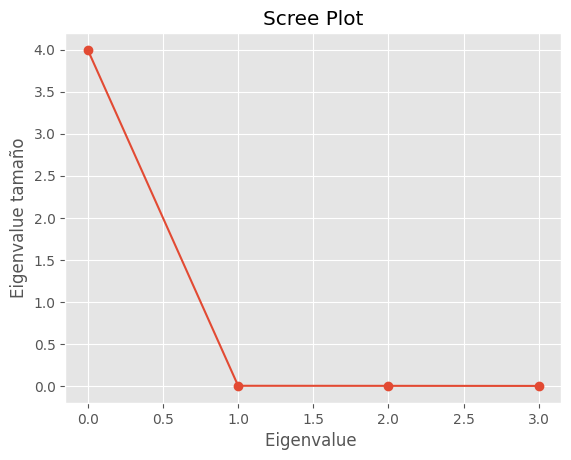

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.plot(fa.get_eigenvalues()[0], marker='o')
plt.xlabel("Eigenvalue ")
plt.ylabel("Eigenvalue tamaño")
plt.title("Scree Plot")

#LOOCV para regresion

In [ ]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df
# shape
print(df.shape)

(3568, 9)


In [ ]:
df.dtypes

Fecha         int64
Ultimo      float64
Apertura    float64
Máximo      float64
Mínimo      float64
Year          int64
Volume      float64
% var.      float64
Train         int64
dtype: object

In [ ]:
# separar en X y y
#df= df.values
X, y = df.drop('Máximo',axis=1), df['Máximo']
print(X.shape, y.shape)

(3568, 8) (3568,)


In [ ]:
# crear el procedimiento LOOCV
cv = LeaveOneOut()

In [ ]:
# crear el modelo
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)

In [ ]:
cross_val_score?

In [ ]:
# evaluar el modelo (criterio de comparacion MAE)
from sklearn.metrics import mean_squared_error,  make_scorer, mean_absolute_error
MAE = make_scorer(mean_absolute_error)
scores = cross_val_score(model, X, y, scoring=MAE, cv=cv,error_score='raise',verbose=1)
# convertir a positivos
scores = abs(scores)
# reportar el performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   15.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   33.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  3.1min
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:  4.0min


MAE: 48.066 (65.201)


El MAE promedio es 0,425 con una desviación estándar de 0,180 a lo largo de las iteraciones de la validación cruzada.

La salida muestra el rendimiento del modelo según el MAE, y un MAE más bajo generalmente indica un mejor rendimiento en términos de predicción.

#Validacion simple

In [ ]:
df
# shape
print(df.shape)

(3568, 9)


In [ ]:
df
X, y = df.drop('Máximo',axis=1), df['Máximo']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape)

(2854, 8) (714, 8)


In [ ]:
# Modelo
model =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
# Ajuste
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [ ]:
predicciones= model.predict(X_test)

In [ ]:
# Validacion simple
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y_test, y_pred= predicciones))
print('MAE: ',mean_absolute_error(y_true= y_test, y_pred= predicciones))
print('R2: ',r2_score(y_true= y_test, y_pred= predicciones))

MSE:  5043.195028688639
MAE:  44.8562866226896
R2:  0.9958130569898468


El MSE es 0.223, que mide el promedio de los cuadrados de los errores entre las predicciones y los valores reales. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.

El MAE es 0.434 (bastante similar al valor arrojado por el LOOCV) , que es la media de los valores absolutos de los errores entre las predicciones y los valores reales. Al igual que el MSE, un valor menor indica un mejor rendimiento.

El coeficiente de determinación (R^2) es -0,019. R^2 es una medida de cuánto se ajustan las predicciones del modelo a los datos reales. Un R^2 más cercano a 1 indica un mejor ajuste, mientras que los valores cercanos a 0 o negativos indican que el modelo no está haciendo un buen trabajo en la predicción. En este caso, el valor negativo sugiere que el modelo no se está realizando bien en comparación con un modelo que simplemente predice la media de los datos de salida.